# Boston Housing Prices
Use regression to predict house prices in Boston

# Table of Content
- [Setup](#setup)
- [Load Data](#load-data)
- [Training](#training)
    - [Linear Regression](#linear-regression)

---

<a name='setup'></a>
# Setup

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

---

<a name='load-data'></a>
# Load Data

[Boston House Prices](https://www.kaggle.com/vikrishnan/boston-house-prices)

## Manully Load Data

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('data/housing.csv', delim_whitespace=True, header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**Content**

- Each record in the database describes a Boston suburb or town.
- The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. 
- The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1):
    - **CRIM**: per capita crime rate by town
    - **ZN**: proportion of residential land zoned for lots over 25,000 sq.ft.
    - **INDUS**: proportion of non-retail business acres per town
    - **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    - **NOX**: nitric oxides concentration (parts per 10 million) 1https://archive.ics.uci.edu/ml/datasets/Housing 123 20.2. Load the Dataset 124
    - **RM**: average number of rooms per dwelling
    - **AGE**: proportion of owner-occupied units built prior to 1940
    - **DIS**: weighted distances to ﬁve Boston employment centers
    - **RAD**: index of accessibility to radial highways
    - **TAX**: full-value property-tax rate per $10,000
    - **PTRATIO**: pupil-teacher ratio by town
    - **B**: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town
    - **LSTAT**: % lower status of the population
    - **MEDV**: Median value of owner-occupied homes in \$1000s 
- We can see that the input attributes have a mixture of units.

In [6]:
features = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PRRATIO',
    'B',
    'LSTAT',
]

target = 'MEDV'

In [7]:
targets = df[13]

In [8]:
df.drop(columns=13, inplace=True)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [9]:
df.columns = features

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


## Load data from sklearn

In [11]:
from sklearn.datasets import load_boston

In [12]:
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [13]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


---

## Training

## Linear Regression

In [14]:
choosen_features = ['RM']

In [15]:
features_vectors = df[choosen_features].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(features_vectors, targets, random_state=42)

In [17]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
print("Slope: ", reg.coef_[0])
print("Intercept: ", reg.intercept_)
print("Socre Training: ", reg.score(X_train, y_train))
print("Socre Testing: ", reg.score(X_test, y_test))

Slope:  9.30417152933
Intercept:  -35.9269762745
Socre Training:  0.5048271277
Socre Testing:  0.38952758464


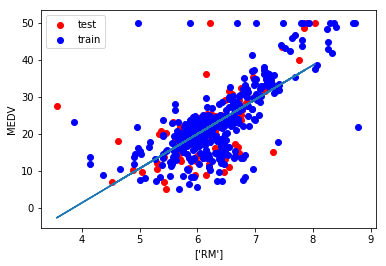

In [18]:
train_color = "b"
test_color = "r"

plt.scatter(X_test, y_test, color=test_color, label='test') 
plt.scatter(X_train, y_train, color=train_color, label='train') 

try:
    plt.plot(X_test, reg.predict(X_test))
except NameError:
    pass
plt.xlabel(choosen_features)
plt.ylabel(target)
plt.legend()

### Training using all features

In [19]:
features_vectors = df.values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(features_vectors, targets, random_state=42)

In [21]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
print("Slope: ", reg.coef_[0])
print("Intercept: ", reg.intercept_)
print("Socre Training: ", reg.score(X_train, y_train))
print("Socre Testing: ", reg.score(X_test, y_test))

Slope:  -0.127824912079
Intercept:  29.8833456272
Socre Training:  0.748105199059
Socre Testing:  0.683955724318


### Feature Selection

In [22]:
from sklearn.feature_selection import f_regression

In [23]:
F_values, p_values = f_regression(X_train, y_train)
print(F_values)
print(p_values)

[  62.36188846   43.38429155  105.51286626   14.41505293   77.39250941
  384.35026996   51.6409215    24.13825894   63.44456758   97.1799917
  117.58774622   43.73068163  466.81166902]
[  3.15563175e-14   1.51417553e-10   5.47643259e-22   1.70818669e-04
   5.09335217e-17   1.66900765e-59   3.59524132e-12   1.33915497e-06
   1.97019852e-14   1.50790372e-20   4.98075278e-24   1.29202843e-10
   6.08380675e-68]


In [24]:
features_and_f_values = list(zip(df.columns, F_values))
features_and_f_values

[('CRIM', 62.361888463487126),
 ('ZN', 43.384291545044299),
 ('INDUS', 105.51286625918603),
 ('CHAS', 14.415052929675833),
 ('NOX', 77.392509410111614),
 ('RM', 384.35026995513164),
 ('AGE', 51.640921504147478),
 ('DIS', 24.138258936831988),
 ('RAD', 63.444567576383903),
 ('TAX', 97.179991696961423),
 ('PTRATIO', 117.5877462186661),
 ('B', 43.730681627699461),
 ('LSTAT', 466.81166902172794)]

In [25]:
features_and_f_values.sort(key=lambda x: x[1], reverse=True)
features_and_f_values

[('LSTAT', 466.81166902172794),
 ('RM', 384.35026995513164),
 ('PTRATIO', 117.5877462186661),
 ('INDUS', 105.51286625918603),
 ('TAX', 97.179991696961423),
 ('NOX', 77.392509410111614),
 ('RAD', 63.444567576383903),
 ('CRIM', 62.361888463487126),
 ('AGE', 51.640921504147478),
 ('B', 43.730681627699461),
 ('ZN', 43.384291545044299),
 ('DIS', 24.138258936831988),
 ('CHAS', 14.415052929675833)]

In [26]:
features_num_seq = range(1, len(features)+1)
result_test_scores = list()
result_training_scores = list()
for num in features_num_seq:
    num_of_choosen_features = num
    selected_features = [
        feature_and_f_value[0]
        for feature_and_f_value in features_and_f_values[:num_of_choosen_features]
    ]
    
    features_vectors = df[selected_features].values
    X_train, X_test, y_train, y_test = train_test_split(features_vectors, targets, random_state=42)
    
    reg = linear_model.LinearRegression()
    reg.fit(X_train, y_train)
    
    result_training_scores.append(reg.score(X_train, y_train))
    result_test_scores.append(reg.score(X_test, y_test))

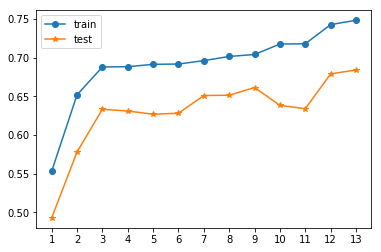

In [27]:
plt.plot(features_num_seq, result_training_scores, marker='o', label='train')
plt.plot(features_num_seq, result_test_scores, marker='*', label='test')

plt.xticks(features_num_seq)
plt.legend()
plt.show()